# JSON API

You need to run '_start_server.py' before running the notebook.

In [1]:
imgfile = "cat-2942887__480.jpg"

In [2]:
%matplotlib inline

In [3]:
from PIL import Image
img = Image.open(imgfile)

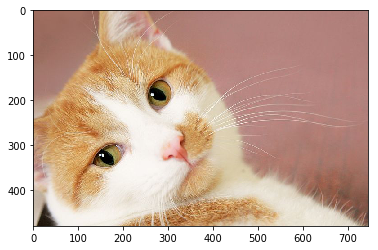

In [4]:
import numpy
from matplotlib.pyplot import imshow
imshow(numpy.asarray(img))

In [5]:
from lightmlrestapi.args import image2base64
import ujson
import requests
b64 = image2base64(imgfile)[1]
features = ujson.dumps({'X': b64})
#r = requests.post('http://127.0.0.1:8081', data=features)  # serveur local
r = requests.post('http://163.172.71.196:8081', data=features)  # serveur distant
js = r.json()

In [6]:
js

{'Y': [[[0.3883158691, 5, {'name': 'oneclass\\cat-2603300__480.jpg'}],
   [0.4457001921, 11, {'name': 'oneclass\\cat-2947188__480.jpg'}],
   [0.4618436036, 27, {'name': 'oneclass\\shotlanskogo-2934720__480.jpg'}],
   [0.4810128851, 2, {'name': 'oneclass\\cat-1508613__480.jpg'}],
   [0.4994667862, 3, {'name': 'oneclass\\cat-188088__480.jpg'}]]]}

In [7]:
res = []
for ans in js['Y']:
    for n in ans:
        res.append((n[0], n[2]['name']))

In [8]:
root = "http://www.xavierdupre.fr/enseignement/complements/dog-cat-pixabay/"
import os
txts = list(map(lambda x: str(x[0]), res))
imgs = list(map(lambda x: root + os.path.split(x[1])[-1], res))

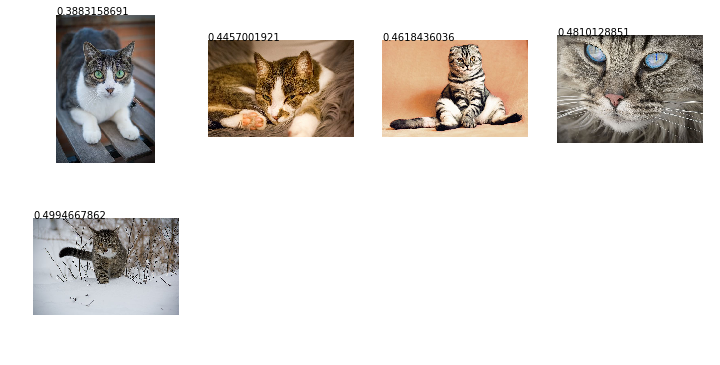

In [9]:
from mlinsights.plotting import plot_gallery_images
plot_gallery_images(imgs, txts);